## Hacemos la limpieza de los dataset

Tenemos que unir la informacion de viajes de cuatro tipos de taxi, cada uno contiene un dataset por mes desde ENE-2022 hasta SEPT-2024

In [2]:
import pandas as pd

In [33]:
# Info sobre el borough al que pertenece cada locacion
zonas = pd.read_csv("C:/Users/NoxiePC/Desktop/taximap/taxi_zone_lookup.csv")

In [5]:
# yTrip (Yellow Trip Data)
yTrip_24_01 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-01.parquet')
yTrip_24_02 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-02.parquet')
yTrip_24_03 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-03.parquet')
yTrip_24_04 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-04.parquet')
yTrip_24_05 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-05.parquet')
yTrip_24_06 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-06.parquet')
yTrip_24_07 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-07.parquet')
yTrip_24_08 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-08.parquet')
yTrip_24_09 = pd.read_parquet('../../../trips_datasets/yellow_tripdata_2024-09.parquet')

# gTrip (Green Trip Data)
gTrip_24_01 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-01.parquet')
gTrip_24_02 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-02.parquet')
gTrip_24_03 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-03.parquet')
gTrip_24_04 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-04.parquet')
gTrip_24_05 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-05.parquet')
gTrip_24_06 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-06.parquet')
gTrip_24_07 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-07.parquet')
gTrip_24_08 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-08.parquet')
gTrip_24_09 = pd.read_parquet('../../../trips_datasets/green_tripdata_2024-09.parquet')

# fhvTrip (FHV Trip Data)
fhvTrip_24_01 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-01.parquet')
fhvTrip_24_02 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-02.parquet')
fhvTrip_24_03 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-03.parquet')
fhvTrip_24_04 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-04.parquet')
fhvTrip_24_05 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-05.parquet')
fhvTrip_24_06 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-06.parquet')
fhvTrip_24_07 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-07.parquet')
fhvTrip_24_08 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-08.parquet')
fhvTrip_24_09 = pd.read_parquet('../../../trips_datasets/fhv_tripdata_2024-09.parquet')

# hvfhvTrip (HV FHV Trip Data)
hvfhvTrip_24_01 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-01.parquet')
hvfhvTrip_24_02 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-02.parquet')
hvfhvTrip_24_03 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-03.parquet')
hvfhvTrip_24_04 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-04.parquet')
hvfhvTrip_24_05 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-05.parquet')
hvfhvTrip_24_06 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-06.parquet')
hvfhvTrip_24_07 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-07.parquet')
hvfhvTrip_24_08 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-08.parquet')
hvfhvTrip_24_09 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-09.parquet')

"# hvfhvTrip (HV FHV Trip Data)\nhvfhvTrip_24_01 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-01.parquet')\nhvfhvTrip_24_02 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-02.parquet')\nhvfhvTrip_24_03 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-03.parquet')\nhvfhvTrip_24_04 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-04.parquet')\nhvfhvTrip_24_05 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-05.parquet')\nhvfhvTrip_24_06 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-06.parquet')\nhvfhvTrip_24_07 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-07.parquet')\nhvfhvTrip_24_08 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-08.parquet')\nhvfhvTrip_24_09 = pd.read_parquet('../../../trips_datasets/fhvhv_tripdata_2024-09.parquet')"

### Limpieza en el dataset de taxis amarillos

In [96]:
# Función para limpiar el dataset
def limpiar_dataset(df):
    df = df[df['trip_distance'] > 0]
    df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]
    df = df[df['total_amount'] > 0]
    df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'total_amount'])
    df = df.drop_duplicates()

    data = df[['tpep_pickup_datetime', 'PULocationID']]
    data = data.rename(columns={'tpep_pickup_datetime': 'Date', 'PULocationID': 'LocationID'})

    data['Date'] = pd.to_datetime(data['Date'])
    data = data[(data['Date'] >= '2024-01-01') & (data['Date'] < '2024-10-01')]
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Hour'] = data['Date'].dt.hour
    data['Day_of_week'] = data['Date'].dt.dayofweek
    data = data.drop(columns=['Date'])

    return data

datasets = [
    yTrip_24_01,
    yTrip_24_02,
    yTrip_24_03,
    yTrip_24_04,
    yTrip_24_05,
    yTrip_24_06,
    yTrip_24_07,
    yTrip_24_08,
    yTrip_24_09
]
nombres_datasets = [
    'yTrip_24_01',
    'yTrip_24_02',
    'yTrip_24_03',
    'yTrip_24_04',
    'yTrip_24_05',
    'yTrip_24_06',
    'yTrip_24_07',
    'yTrip_24_08',
    'yTrip_24_09'
]

trip_yellow_data = pd.DataFrame()

for df, nombre in zip(datasets, nombres_datasets):
    df_limpio = limpiar_dataset(df)
    trip_yellow_data = pd.concat([trip_yellow_data, df_limpio], ignore_index=True)
    print(f'{nombre} limpio contiene {len(df_limpio)} registros.')

print('Limpieza completada para todos los datasets.')
print(f'El dataset trip_yellow_data contiene {len(trip_yellow_data)} registros.')


yTrip_24_01 limpio contiene 2871895 registros.
yTrip_24_02 limpio contiene 2906291 registros.
yTrip_24_03 limpio contiene 3454623 registros.
yTrip_24_04 limpio contiene 3428544 registros.
yTrip_24_05 limpio contiene 3629227 registros.
yTrip_24_06 limpio contiene 3441521 registros.
yTrip_24_07 limpio contiene 2982452 registros.
yTrip_24_08 limpio contiene 2872768 registros.
yTrip_24_09 limpio contiene 3500116 registros.
Limpieza completada para todos los datasets.
El dataset trip_yellow_data contiene 29087437 registros.


### Limpieza de taxis verdes

In [95]:
# Función para limpiar el dataset
def limpiar_dataset(df):
    df = df[df['trip_distance'] > 0]
    df = df[df['lpep_pickup_datetime'] < df['lpep_dropoff_datetime']]
    df = df[df['total_amount'] > 0]
    df = df.dropna(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'total_amount'])
    df = df.drop_duplicates()
    
    data = df[['lpep_pickup_datetime', 'PULocationID']]
    data = data.rename(columns={'lpep_pickup_datetime': 'Date', 'PULocationID': 'LocationID'})

    data['Date'] = pd.to_datetime(data['Date'])
    data = data[(data['Date'] >= '2024-01-01') & (data['Date'] < '2024-10-01')]
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Hour'] = data['Date'].dt.hour
    data['Day_of_week'] = data['Date'].dt.dayofweek
    data = data.drop(columns=['Date'])

    return data

# Lista de datasets ya cargados
datasets = [
    gTrip_24_01,
    gTrip_24_02,
    gTrip_24_03,
    gTrip_24_04,
    gTrip_24_05,
    gTrip_24_06,
    gTrip_24_07,
    gTrip_24_08,
    gTrip_24_09
]
nombres_datasets = [
    'greenTrip_24_01',
    'greenTrip_24_02',
    'greenTrip_24_03',
    'greenTrip_24_04',
    'greenTrip_24_05',
    'greenTrip_24_06',
    'greenTrip_24_07',
    'greenTrip_24_08',
    'greenTrip_24_09'
]

# Limpiar y procesar cada dataset por separado y unir en pequeños lotes
trip_green_data = pd.DataFrame()

for df, nombre in zip(datasets, nombres_datasets):
    df_limpio = limpiar_dataset(df)
    trip_green_data = pd.concat([trip_green_data, df_limpio], ignore_index=True)
    print(f'{nombre} limpio contiene {len(df_limpio)} registros.')

print('Limpieza completada para todos los datasets.')
print(f'El dataset trip_green_data contiene {len(trip_green_data)} registros.')


greenTrip_24_01 limpio contiene 53547 registros.
greenTrip_24_02 limpio contiene 50616 registros.
greenTrip_24_03 limpio contiene 54301 registros.
greenTrip_24_04 limpio contiene 53135 registros.
greenTrip_24_05 limpio contiene 57726 registros.
greenTrip_24_06 limpio contiene 51899 registros.
greenTrip_24_07 limpio contiene 48716 registros.
greenTrip_24_08 limpio contiene 48932 registros.
greenTrip_24_09 limpio contiene 51508 registros.
Limpieza completada para todos los datasets.
El dataset trip_green_data contiene 470380 registros.


### Limpieza de taxis fhv

In [97]:
# Función para limpiar el dataset
def limpiar_dataset(df):
    df = df[df['pickup_datetime'] < df['dropOff_datetime']]
    df = df.dropna(subset=['pickup_datetime', 'dropOff_datetime', 'PUlocationID', 'DOlocationID'])
    df = df.drop(columns=['SR_Flag'])  # Eliminar columna sin datos relevantes
    df = df.drop_duplicates()
    
    data = df[['pickup_datetime', 'PUlocationID']]
    data = data.rename(columns={'pickup_datetime': 'Date', 'PUlocationID': 'LocationID'})

    data['Date'] = pd.to_datetime(data['Date'])
    data = data[(data['Date'] >= '2024-01-01') & (data['Date'] < '2024-10-01')]
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Hour'] = data['Date'].dt.hour
    data['Day_of_week'] = data['Date'].dt.dayofweek
    data = data.drop(columns=['Date'])

    return data

# Lista de datasets ya cargados
datasets = [
    fhvTrip_24_01,
    fhvTrip_24_02,
    fhvTrip_24_03,
    fhvTrip_24_04,
    fhvTrip_24_05,
    fhvTrip_24_06,
    fhvTrip_24_07,
    fhvTrip_24_08,
    fhvTrip_24_09
]
nombres_datasets = [
    'fhvTrip_24_01',
    'fhvTrip_24_02',
    'fhvTrip_24_03',
    'fhvTrip_24_04',
    'fhvTrip_24_05',
    'fhvTrip_24_06',
    'fhvTrip_24_07',
    'fhvTrip_24_08',
    'fhvTrip_24_09'
]

# Limpiar y procesar cada dataset por separado y unir en pequeños lotes
trip_fhv_data = pd.DataFrame()

for df, nombre in zip(datasets, nombres_datasets):
    df_limpio = limpiar_dataset(df)
    trip_fhv_data = pd.concat([trip_fhv_data, df_limpio], ignore_index=True)
    print(f'{nombre} limpio contiene {len(df_limpio)} registros.')

print('Limpieza completada para todos los datasets.')
print(f'El dataset trip_fhv_data contiene {len(trip_fhv_data)} registros.')


fhvTrip_24_01 limpio contiene 263066 registros.
fhvTrip_24_02 limpio contiene 200241 registros.
fhvTrip_24_03 limpio contiene 265847 registros.
fhvTrip_24_04 limpio contiene 368550 registros.
fhvTrip_24_05 limpio contiene 264970 registros.
fhvTrip_24_06 limpio contiene 326072 registros.
fhvTrip_24_07 limpio contiene 354368 registros.
fhvTrip_24_08 limpio contiene 233586 registros.
fhvTrip_24_09 limpio contiene 386814 registros.
Limpieza completada para todos los datasets.
El dataset trip_fhv_data contiene 2663514 registros.


### Limpieza de taxis hvfhv  (no se puede procesar por un problema de memoria)

In [4]:
# Función para limpiar el dataset
def limpiar_dataset(df):
    df = df[df['trip_miles'] >= 0]
    df = df[df['pickup_datetime'] < df['dropoff_datetime']]
    df = df[df['trip_time'] >= 0]
    df = df[df['base_passenger_fare'] >= 0]
    df = df.dropna(subset=['pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles', 'base_passenger_fare'])
    df = df.drop_duplicates()
    
    data = df[['pickup_datetime', 'PULocationID']]
    data = data.rename(columns={'pickup_datetime': 'Date', 'PULocationID': 'LocationID'})

    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data['Hour'] = data['Date'].dt.hour
    data['Day_of_week'] = data['Date'].dt.dayofweek
    data = data.drop(columns=['Date'])

    return data

# Función para dividir el dataset en partes
def dividir_dataset(df, chunk_size):
    for start in range(0, df.shape[0], chunk_size):
        yield df[start:start + chunk_size]

datasets = [
    hvfhvTrip_24_01,
    hvfhvTrip_24_02,
    hvfhvTrip_24_03,
    hvfhvTrip_24_04,
    hvfhvTrip_24_05,
    hvfhvTrip_24_06,
    hvfhvTrip_24_07,
    hvfhvTrip_24_08,
    hvfhvTrip_24_09
]
nombres_datasets = [
    'hvfhvTrip_24_01',
    'hvfhvTrip_24_02',
    'hvfhvTrip_24_03',
    'hvfhvTrip_24_04',
    'hvfhvTrip_24_05',
    'hvfhvTrip_24_06',
    'hvfhvTrip_24_07',
    'hvfhvTrip_24_08',
    'hvfhvTrip_24_09'
]

# Limpiar y procesar cada dataset por separado y unir en pequeños lotes
trip_fhvhv_data = pd.DataFrame()
chunk_size = 1000000  # Ajusta el tamaño según la memoria disponible

for df, nombre in zip(datasets, nombres_datasets):
    for chunk in dividir_dataset(df, chunk_size):
        df_limpio = limpiar_dataset(chunk)
        #trip_fhvhv_data = pd.concat([trip_fhvhv_data, df_limpio], ignore_index=True)
    print(f'{nombre} limpio contiene {len(df_limpio)} registros.')

print('Limpieza completada para todos los datasets.')
print(f'El dataset trip_fhvhv_data contiene {len(trip_fhvhv_data)} registros.')


hvfhvTrip_24_01 limpio contiene 663929 registros.
hvfhvTrip_24_02 limpio contiene 359089 registros.
hvfhvTrip_24_03 limpio contiene 280768 registros.
hvfhvTrip_24_04 limpio contiene 733023 registros.
hvfhvTrip_24_05 limpio contiene 704533 registros.
hvfhvTrip_24_06 limpio contiene 123225 registros.
hvfhvTrip_24_07 limpio contiene 182919 registros.
hvfhvTrip_24_08 limpio contiene 128389 registros.
hvfhvTrip_24_09 limpio contiene 209781 registros.
Limpieza completada para todos los datasets.
El dataset trip_fhvhv_data contiene 0 registros.


## Agrupar los dataset por Hour y locationID

In [98]:
# Agrupar los dataset de viajes por LocationID, Year, Month, Day, Hour y crear una nueva columna con la suma de viajes

trip_yellow_data_grouped = trip_yellow_data.groupby(['LocationID', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week']).size().reset_index(name='trips')
trip_green_data_grouped = trip_green_data.groupby(['LocationID', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week']).size().reset_index(name='trips')
trip_fhv_data_grouped = trip_fhv_data.groupby(['LocationID', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week']).size().reset_index(name='trips')

#Union de los datasets por LocationID, Year, Month, Day, Hour, Day_of_week y sumar la columna trips
trip_data = pd.concat([trip_yellow_data_grouped, trip_green_data_grouped, trip_fhv_data_grouped], ignore_index=True)
trip_data = trip_data.groupby(['LocationID', 'Year', 'Month', 'Day', 'Hour', 'Day_of_week']).agg({'trips': 'sum'}).reset_index()


In [99]:
# Convertir LocationID en trip_data a int64 
trip_data['LocationID'] = trip_data['LocationID'].astype(int)
#  # Realizar el merge para agregar la columna 'Borough' al dataset 'trip_data' 
trip_data = trip_data.merge(zonas[['LocationID', 'Borough']], on='LocationID', how='left')

In [100]:
# Filtrar filas donde Borough no es nan, Unknown o EWR 
trip_data = trip_data[~trip_data['Borough'].isin(['Unknown', 'EWR'])] 
trip_data = trip_data.dropna(subset=['Borough'])

## Traemos el dataset de clima

In [2]:
#pip install openmeteo-requests
#pip install requests-cache retry-requests numpy pandas
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
latitudes = [40.6815, 40.6501, 40.7834, 40.8499, 40.5623]
longitudes = [-73.8365, -73.9496, -73.9663, -73.8664, -74.1399]
boroughs = ["Queens", "Brooklyn", "Manhattan", "Bronx", "Staten Island"]
params = {
    "latitude": latitudes,
    "longitude": longitudes,
    "start_date": "2022-01-01",
    "end_date": "2024-09-30",
    "hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "rain", "snowfall", "weather_code", "pressure_msl", "cloud_cover", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m"],
    "timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)

# Initialize an empty list to store the data for all boroughs
data_list = []

# Process each borough
for i, response in enumerate(responses):
    hourly = response.Hourly()
    hourly_data = {
        "date": pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        ),
        "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
        "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
        "dew_point_2m": hourly.Variables(2).ValuesAsNumpy(),
        "apparent_temperature": hourly.Variables(3).ValuesAsNumpy(),
        "rain": hourly.Variables(4).ValuesAsNumpy(),
        "snowfall": hourly.Variables(5).ValuesAsNumpy(),
        "weather_code": hourly.Variables(6).ValuesAsNumpy(),
        "pressure_msl": hourly.Variables(7).ValuesAsNumpy(),
        "cloud_cover": hourly.Variables(8).ValuesAsNumpy(),
        "wind_speed_10m": hourly.Variables(9).ValuesAsNumpy(),
        "wind_direction_10m": hourly.Variables(10).ValuesAsNumpy(),
        "wind_gusts_10m": hourly.Variables(11).ValuesAsNumpy(),
        "Borough": boroughs[i]
    }
    data_list.append(pd.DataFrame(hourly_data))

# Concatenate all the dataframes into one
df_clima = pd.concat(data_list, ignore_index=True)

#filtrar los datos de clima para que coincidan con las fechas de los viajes
df_clima = df_clima[(df_clima['date'] >= '2024-01-01') & (df_clima['date'] < '2024-10-01')]

# Descomponer la columna date en Year, Month, Day, Hour y Day_of_week
df_clima['Year'] = df_clima['date'].dt.year
df_clima['Month'] = df_clima['date'].dt.month
df_clima['Day'] = df_clima['date'].dt.day
df_clima['Hour'] = df_clima['date'].dt.hour
df_clima['Day_of_week'] = df_clima['date'].dt.dayofweek
# Borrar la columna date, Rain y Snowfall
df_clima = df_clima.drop(columns=['date', 'rain', 'snowfall'])


In [ ]:
#Unir los datasets de clima y viajes por Year, Month, Day, Hour y Day_of_week y Borough
data = trip_data.merge(df_clima, on=['Year', 'Month', 'Day', 'Hour', 'Day_of_week', 'Borough'], how='left')
data.to_parquet('data_to_train_model.parquet')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133503 entries, 0 to 1133502
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   LocationID            1133503 non-null  int64  
 1   Year                  1133503 non-null  int32  
 2   Month                 1133503 non-null  int32  
 3   Day                   1133503 non-null  int32  
 4   Hour                  1133503 non-null  int32  
 5   Day_of_week           1133503 non-null  int32  
 6   trips                 1133503 non-null  int64  
 7   Borough               1133503 non-null  object 
 8   temperature_2m        1133503 non-null  float32
 9   relative_humidity_2m  1133503 non-null  float32
 10  dew_point_2m          1133503 non-null  float32
 11  apparent_temperature  1133503 non-null  float32
 12  weather_code          1133503 non-null  float32
 13  pressure_msl          1133503 non-null  float32
 14  cloud_cover           1133503 non-

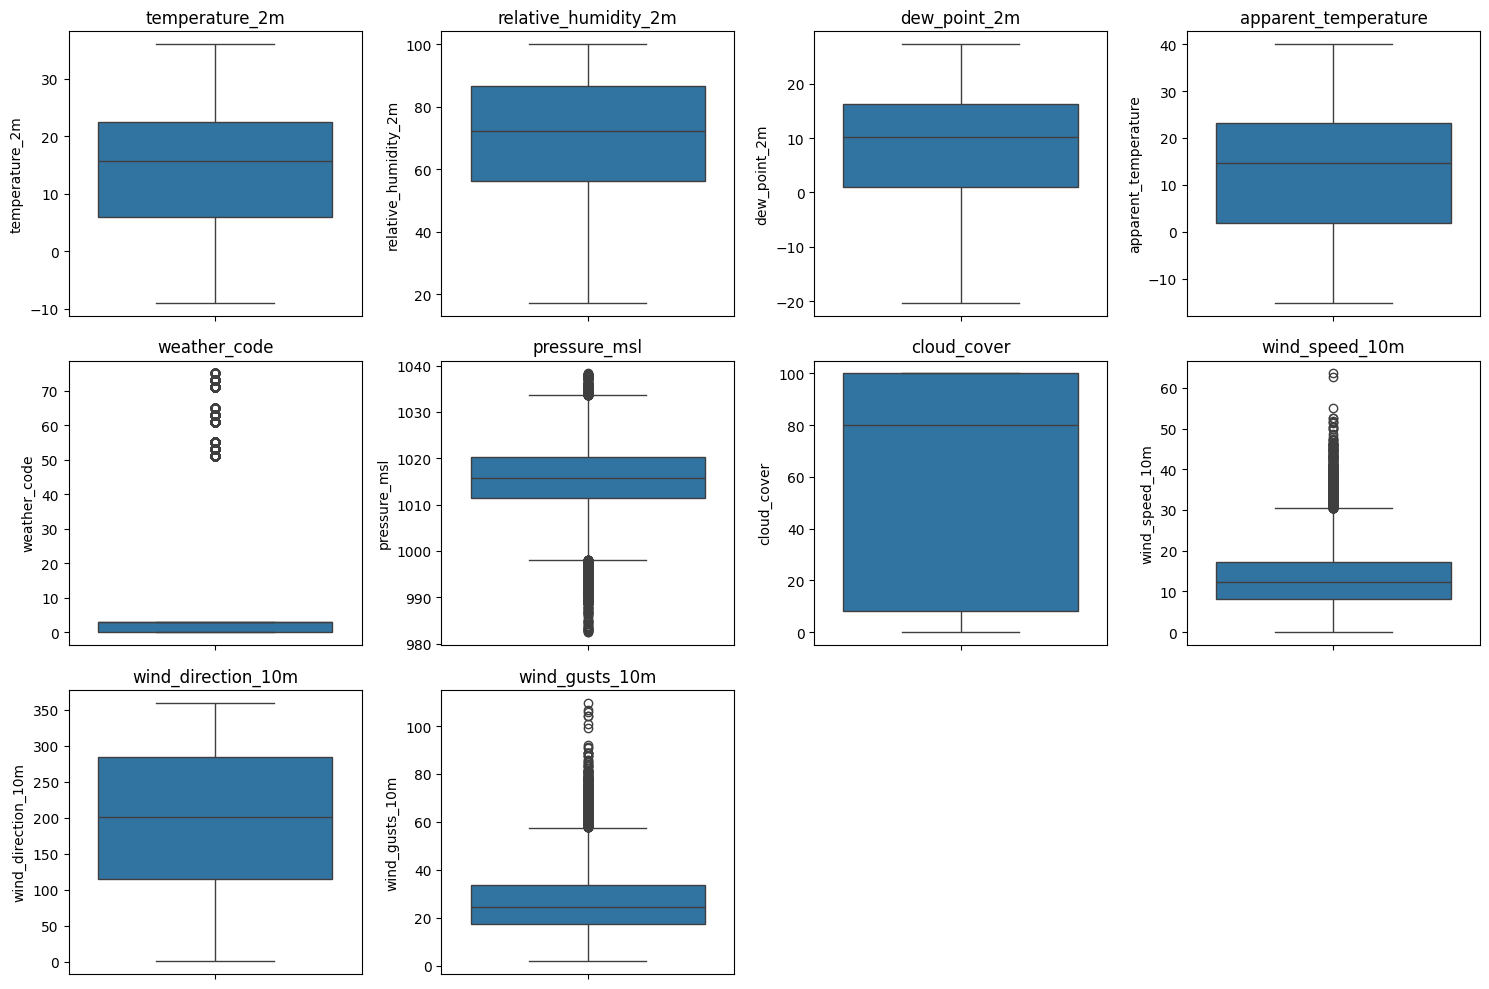

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas de condiciones climáticas
columnas_clima = [
    'temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 
    'apparent_temperature', 'weather_code', 'pressure_msl', 
    'cloud_cover', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m'
]

# Crear un boxplot para cada condición climática
plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_clima, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_clima[columna])
    plt.title(columna)
plt.tight_layout()
plt.show()
